## CURE Clustering

Load in CURE.q which also loads in the kdtree file.

In [1]:
\l CURE.q

Clustering is useful in data mining and statistical data analysis for grouping similar data points together and identifying patterns in distributions.

The majority of clustering algorithms work well for spherical objects but break down when there are outliers in the dataset. A way to deal with these outliers is to use CURE clustering which is more rebust to datasets with large differences in size or caontaining outliers. 

In CURE clustering each cluster is represented by a certain number of representative points. These representative points are chosen from the cluster by taking the the most scattered points in the cluster and then shrinking them towards the centre of the cluster by a fixed amount. This amount is called the compression. This shrinking helps to reduce the effect of outliers. 

A k-d tree is also deployed in CURE clustering in order to store all the representative points of each cluster. 

The below creates an image with 4 different clusters, where datapts controls how many datapoints the shape has.

In [2]:
datapts:2000
dsc:{[n;r;s](r+n?s-r)*/:(cos;sin)@\:4*n?acos 0}
data :flip(-5 1)+(1 1.5)*dsc[1000; 0;1.8],'dsc[2000;3.1;4.2],'dsc[4000;5.2;6.5]
data,:flip(4 -1)+(1 8)*dsc[4000; 0;1.]
data@:neg[datapts&count data]?count data
sample:data

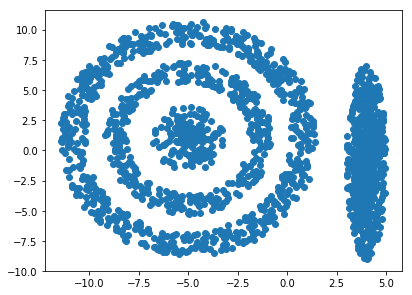

In [3]:
plt:.p.import[`matplotlib]`:pyplot;
plt[`:scatter][;]. flip sample;
plt[`:show][];

cure is the function that breaks the function up into the desired cluster groups. The function takes 4 inputs cure[sample;x;y;z], where sample is the data that needs to be clustered, x is the amount of representative points, y is the compression which is number between 0 and 1, and z is the amount of clusters that the data is to be split into. The function returns the indices of the sample grouped into clusters

In [4]:
show cl:.kd.cure.cure[sample;30;0.01;4]

1069 1585 164 315 716 567 1356 1310 295 784 1759 1584 1428 1758 859 670 304 1..
1273 1493 1162 166 382 99 1488 1586 719 792 394 71 1188 1837 61 1944 337 1901..
1921 696 595 1029 374 461 1703 1793 247 1531 12 251 599 623 700 316 1439 121 ..
400 375 1457 1740 629 1395 456 1053 935 544 865 922 47 1818 1073 1551 1036 14..


To check if the clustering is correct, the results can be plotted using matplotlib, with each cluster represented with a different colour. 

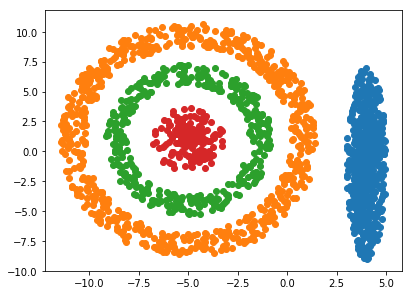

In [5]:
{plt[`:scatter][;]. flip sample[x]}each cl;
plt[`:show][];

### Adding compression to clustering

The following is an example of how adding the compression can make a difference when the dataset contains outliers and has varying sizes of clusters

In [6]:
FCPS_SAMPLES:.p.import[`pyclustering.samples.definitions]`:FCPS_SAMPLES;
readsam:.p.import[`pyclustering.utils]`:read_sample;
sample2:readsam[FCPS_SAMPLES[`:SAMPLE_TARGET]]`

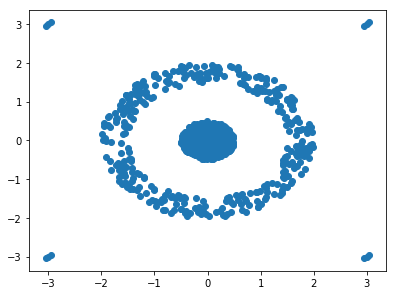

In [7]:
plt:.p.import[`matplotlib]`:pyplot;
plt[`:scatter][;]. flip sample2;
plt[`:show][];

From the above image there it is evident that there is a large spread of data points away from the centre which could cause issues if there is a small amount of representative points used.

In [8]:
show cl2:.kd.cure.cure[sample2;5;0;6]

3 402 769
0 766 399
497 430 471 660 474 548 701 714 644 725 598 699 425 629 489 599 461 473 444 6..
218 11 6 153 143 172 75 99 149 274 189 255 369 14 105 265 311 179 19 388 121 ..
401 2 768
1 767 400


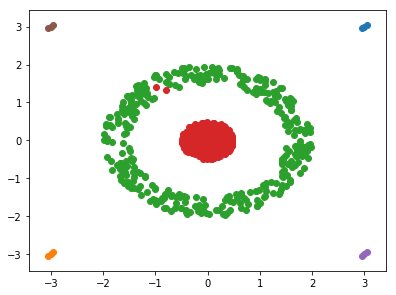

In [9]:
{plt[`:scatter][;]. flip sample2[x]}each cl2;
plt[`:show][];

The above image shows how the centre cluster and its surrounding ring are not classified correctly. This can be rectified by adding a compressing which moves the representative points of each cluster towards its centre to deal with varying shapes and outliers.

In [10]:
show clcomp:.kd.cure.cure[sample2;5;0.1;6]

3 402 769
400 1 767
681 645 470 411 483 712 615 652 700 741 754 735 407 626 574 592 669 506 765 5..
6 153 75 50 370 383 291 59 195 166 177 143 172 218 297 57 84 155 335 253 102 ..
401 2 768
0 766 399


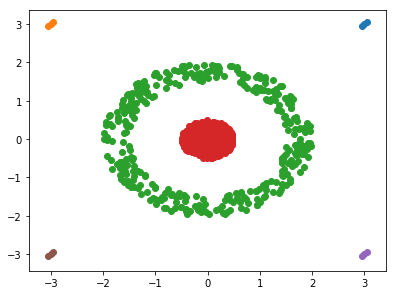

In [11]:
{plt[`:scatter][;]. flip sample2[x]}each clcomp;
plt[`:show][];

By adding a compression of 0.1, the datapoints were correctly clusters.

## Higher dimenion clustering

The CURE clustering function also works for datasets of higher dimenions as shown below

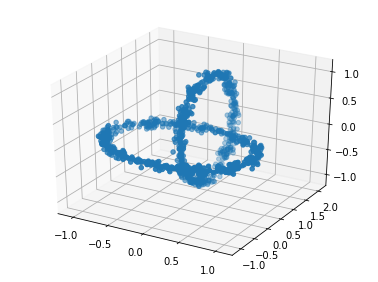

In [12]:
hdsample:readsam[FCPS_SAMPLES[`:SAMPLE_CHAINLINK]]`

.p.import[`mpl_toolkits.mplot3d]`:Axes3D;
fig:plt[`:figure][];
ax:fig[`:add_subplot][111;`projection pykw"3d"];
ax[`:scatter][[hdsample][;0];[hdsample][;1];[hdsample][;2]];
plt[`:show][];

In [13]:
hdcl:.kd.cure.cure[hdsample;10;0.1;2]

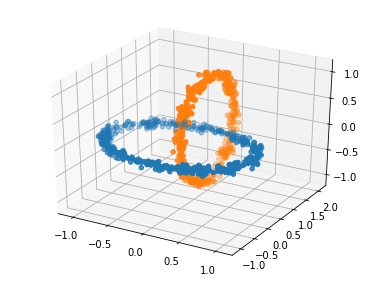

In [14]:

fig:plt[`:figure][];
ax:fig[`:add_subplot][111;`projection pykw"3d"];
ax[`:scatter][[hdsample hdcl][0][;0];[hdsample hdcl][0][;1];[hdsample hdcl][0][;2]];
ax[`:scatter][[hdsample hdcl][1][;0];[hdsample hdcl][1][;1];[hdsample hdcl][1][;2]];

plt[`:show][];